In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
def imshow(title= "Image", image= None, size= 6):
  h,w = image.shape[0], image.shape[1]
  aspect_ratio = h/w
  plt.figure(figsize = (size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

In [3]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-06-30 12:49:44--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.22
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  13.9MB/s    in 2.0s    

2022-06-30 12:49:46 (13.9 MB/s) - ‘images.zip’ saved [29586716/29586716]



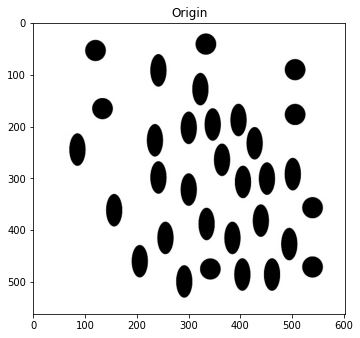

In [6]:
# load image
image = cv2.imread("images/blobs.jpg",0)
imshow("Origin", image, size = 6)

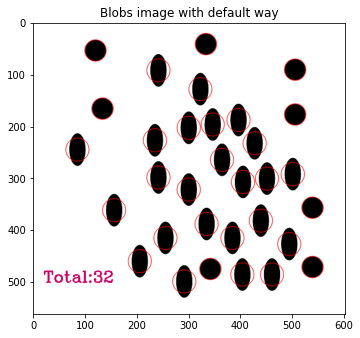

In [9]:
# using circle detection in cv2

# Initialize the detector using the default parameters
detector = cv2.SimpleBlobDetector_create()

# Detect blob
keypoints = detector.detect(image)

# Draw blobs on image as red cricle
blank = np.zeros((1,1))
blobs_img = cv2.drawKeypoints(image, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

num_of_blobs = len(keypoints)
text = "Total:" + str(num_of_blobs)
cv2.putText(blobs_img, text, (20,500), cv2.FONT_HERSHEY_COMPLEX, 1, (100,5,200),2)

# Display image
imshow("Blobs image with default way", blobs_img)

In [10]:
![](https://i.stack.imgur.com/zYL2C.jpg)
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/simpleblob.png)

/bin/bash: -c: line 0: syntax error near unexpected token `https://i.stack.imgur.com/zYL2C.jpg'
/bin/bash: -c: line 0: `[](https://i.stack.imgur.com/zYL2C.jpg)'
/bin/bash: -c: line 0: syntax error near unexpected token `https://github.com/rajeevratan84/ModernComputerVision/raw/main/simpleblob.png'
/bin/bash: -c: line 0: `[](https://github.com/rajeevratan84/ModernComputerVision/raw/main/simpleblob.png)'


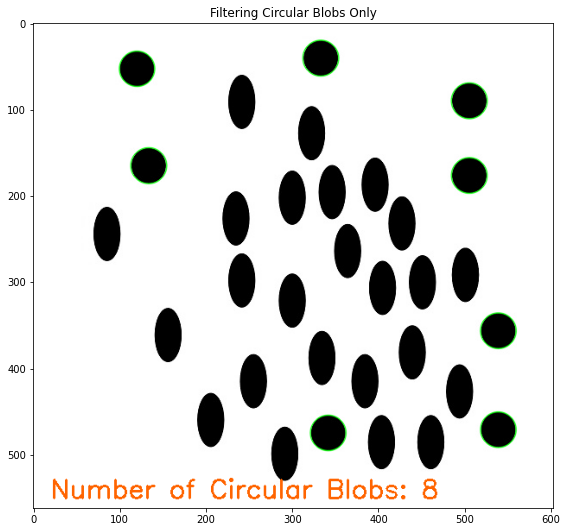

In [16]:
# Using _params to detect circle

# Initialize the detector using the cv2.SimpleBlobDetector_Param
params = cv2.SimpleBlobDetector_Params()

# Setting some parameter to params => using to detect more detail
params.filterByArea = True # circle type only
params.minArea = 100 # min size of circle

# Set Circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2

# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
imshow("Filtering Circular Blobs Only", blobs, size = 10)

# Detection followed by image

Notes on Template Matching
There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag cv2.TM_CCOEFF.

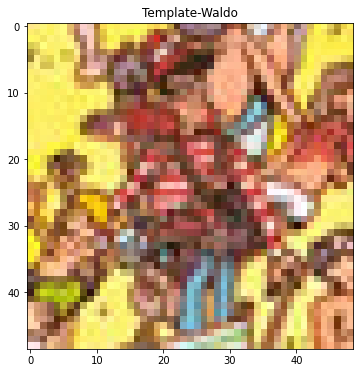

In [20]:
# loading template use to detect on full image
template = cv2.imread('./images/waldo.jpg')
imshow('Template-Waldo', template)

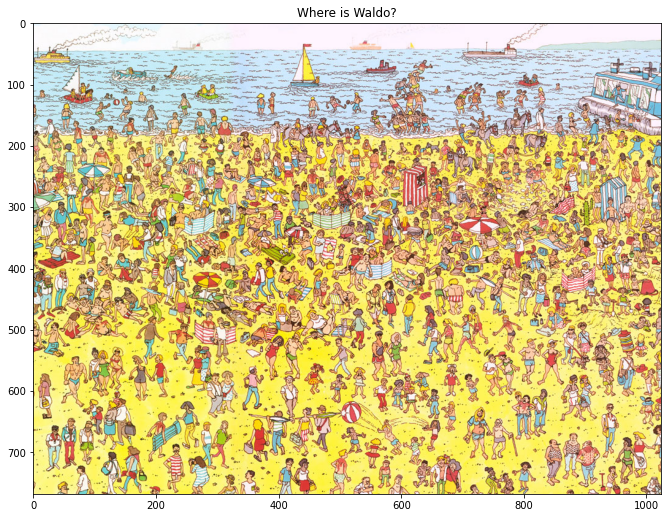

In [19]:
# Load fully image and convert to grayscale
image = cv2.imread('./images/WaldoBeach.jpg')
imshow('Where is Waldo?', image, size = 15)

In [23]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Using matchTemplate to work
result = cv2.matchTemplate(gray_img, gray_template, cv2.TM_CCOEFF)
print(result) #position

[[-339930.7   -375058.94  -478743.47  ...   56064.69    61431.37
    63949.098]
 [-363627.72  -412662.8   -485376.8   ...   63227.5     72060.79
    77810.516]
 [-377945.    -424462.72  -429008.6   ...   54776.22    47708.184
    49601.95 ]
 ...
 [-136798.86   -43490.64   -36942.668 ... -892019.5   -838747.2
  -891842.75 ]
 [ -52494.387   11900.145 -103294.3   ... -742791.7   -720544.06
  -689482.56 ]
 [ -95510.58   -38368.375 -128554.195 ... -461283.75  -461210.7
  -380461.06 ]]


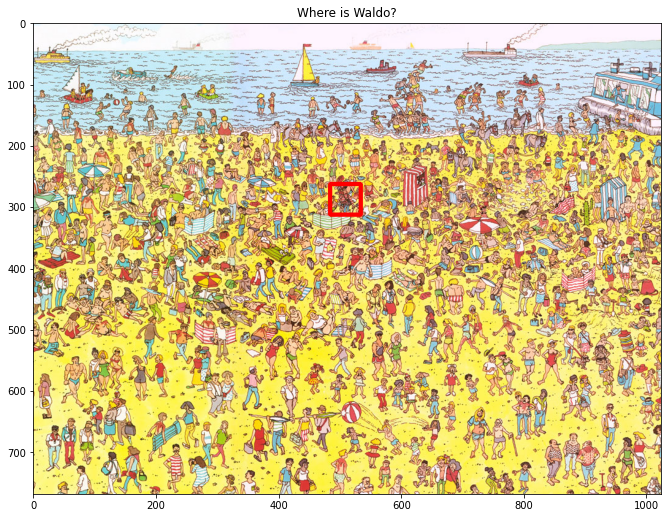

In [25]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

imshow('Where is Waldo?', image, size = 15)